# Installation of PySpark

In [4]:
import pyspark

In [5]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark import SparkConf
from pyspark.sql.functions import desc
from pyspark.sql.functions import *
import pyspark.sql.functions as F

In [6]:
SparkSession \
  .builder \
  .master("local[*]")\
  .appName("Pyspark") \
  .config("spark.memory.fraction", 0.8) \
  .config("spark.executor.memory", "16g") \
  .config("spark.driver.memory", "16g")\
  .config("spark.sql.shuffle.partitions" , "800") \
  .config("spark.memory.offHeap.enabled",'true')\
  .config("spark.memory.offHeap.size","16g")\
  .getOrCreate()

# Importing of libraries 

In [7]:
mySparkanalysis = SparkSession.builder.getOrCreate()
spark = SparkSession(mySparkanalysis)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
%matplotlib inline

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

# Loading of dataset

In [75]:
df = spark.read.csv("2014_Financial_Data.csv",inferSchema="true", header="true")

In [14]:
df.count()

3808

In [15]:
df

DataFrame[_c0: string, Revenue: double, Revenue Growth: double, Cost of Revenue: double, Gross Profit: double, R&D Expenses: double, SG&A Expense: double, Operating Expenses: double, Operating Income: double, Interest Expense: double, Earnings before Tax: double, Income Tax Expense: double, Net Income - Non-Controlling int: double, Net Income - Discontinued ops: double, Net Income: double, Preferred Dividends: double, Net Income Com: double, EPS: double, EPS Diluted: double, Weighted Average Shs Out: double, Weighted Average Shs Out (Dil): double, Dividend per Share: double, Gross Margin: double, EBITDA Margin: double, EBIT Margin: double, Profit Margin: double, Free Cash Flow margin: double, EBITDA: double, EBIT: double, Consolidated Income: double, Earnings Before Tax Margin: double, Net Profit Margin: double, Cash and cash equivalents: double, Short-term investments: double, Cash and short-term investments: double, Receivables: double, Inventories: double, Total current assets: doub

In [16]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- Revenue: double (nullable = true)
 |-- Revenue Growth: double (nullable = true)
 |-- Cost of Revenue: double (nullable = true)
 |-- Gross Profit: double (nullable = true)
 |-- R&D Expenses: double (nullable = true)
 |-- SG&A Expense: double (nullable = true)
 |-- Operating Expenses: double (nullable = true)
 |-- Operating Income: double (nullable = true)
 |-- Interest Expense: double (nullable = true)
 |-- Earnings before Tax: double (nullable = true)
 |-- Income Tax Expense: double (nullable = true)
 |-- Net Income - Non-Controlling int: double (nullable = true)
 |-- Net Income - Discontinued ops: double (nullable = true)
 |-- Net Income: double (nullable = true)
 |-- Preferred Dividends: double (nullable = true)
 |-- Net Income Com: double (nullable = true)
 |-- EPS: double (nullable = true)
 |-- EPS Diluted: double (nullable = true)
 |-- Weighted Average Shs Out: double (nullable = true)
 |-- Weighted Average Shs Out (Dil): double (nullab

# Dropping Unnecessary columns

In [55]:
dataset = df.drop('_c0', 'operatingCycle', 'cashConversionCycle')

In [18]:
dataset.show()

+-------------------+--------------+--------------------+-----------------+----------------+-----------------+------------------+-----------------+----------------+-------------------+------------------+--------------------------------+-----------------------------+-----------------+-------------------+-----------------+------+-----------+------------------------+------------------------------+------------------+------------+-------------------+-----------+--------------------+---------------------+-----------------+-----------------+-------------------+--------------------------+-----------------+-------------------------+----------------------+-------------------------------+-----------------+----------------+--------------------+-------------------------------+------------------------------+---------------------+-----------------+------------------------+-------------------+-----------------+----------------+-------------------------+-----------------+-----------------+-------------

# GroupBy categories of columns

In [19]:
dataset.groupBy('Short-term investments').count().sort(desc("count")).show(20)

+----------------------+-----+
|Short-term investments|count|
+----------------------+-----+
|                   0.0| 1812|
|                  null|  933|
|                 2.0E7|    4|
|             3000000.0|    3|
|                1.08E8|    3|
|             1500000.0|    2|
|                8.89E8|    2|
|             8000000.0|    2|
|             2000000.0|    2|
|                1.45E7|    2|
|             9000000.0|    2|
|                 4.8E7|    2|
|                 1.1E7|    2|
|                 3.4E7|    2|
|             4.6048E10|    2|
|                 1.0E7|    2|
|             5000000.0|    2|
|                5.55E8|    2|
|             1000000.0|    2|
|             1.45983E8|    1|
+----------------------+-----+
only showing top 20 rows



In [20]:
dataset.groupBy(dataset.Sector).count().sort(desc("count")).show(20, truncate = False)

+----------------------+-----+
|Sector                |count|
+----------------------+-----+
|Financial Services    |660  |
|Healthcare            |582  |
|Technology            |576  |
|Industrials           |501  |
|Consumer Cyclical     |457  |
|Basic Materials       |242  |
|Real Estate           |224  |
|Energy                |221  |
|Consumer Defensive    |165  |
|Utilities             |97   |
|Communication Services|83   |
+----------------------+-----+



In [22]:
dataset.filter(dataset.Sector.contains('Energy')).show(60,truncate = False)

+-------------------+---------------------+-------------------+-------------------+---------------+----------------+-------------------+-----------------+-----------------+-------------------+------------------+--------------------------------+-----------------------------+-----------------+-------------------+-----------------+------------------+-----------+------------------------+------------------------------+------------------+-------------------+--------------------+--------------------+--------------------+---------------------+-------------------+-----------------+-------------------+--------------------------+-----------------+-------------------------+----------------------+-------------------------------+-----------------+-----------------+--------------------+-------------------------------+------------------------------+---------------------+----------------+------------------------+-------------------+-----------------+----------------+-------------------------+----------

In [24]:
data = dataset.groupBy('Invested Capital', 'Sector').count().sort(desc("count"))

In [25]:
data.filter(data.Sector.contains('Financial Services')).count()

612

In [26]:
data.filter(data.Sector.contains('Financial Services')).show(60)

+--------------------+------------------+-----+
|    Invested Capital|            Sector|count|
+--------------------+------------------+-----+
|                null|Financial Services|   49|
|           7.59749E8|Financial Services|    1|
|          5.162367E9|Financial Services|    1|
|       1.256889979E9|Financial Services|    1|
|          1.13218E11|Financial Services|    1|
|           2.20748E8|Financial Services|    1|
|        1.0895788E10|Financial Services|    1|
|           3.98523E8|Financial Services|    1|
|         2.127197E10|Financial Services|    1|
|          2.853773E9|Financial Services|    1|
|          7.932697E9|Financial Services|    1|
|          1.508248E9|Financial Services|    1|
|           5.81866E8|Financial Services|    1|
|             2.436E7|Financial Services|    1|
|          1.366264E9|Financial Services|    1|
|           6.78002E8|Financial Services|    1|
|          4.218386E9|Financial Services|    1|
|1.359224299065421E12|Financial Services

In [27]:
data.filter(data.Sector.contains('Healthcare')).count()

570

In [28]:
data.filter(data.Sector.contains('Healthcare')).show(60)

+-----------------+----------+-----+
| Invested Capital|    Sector|count|
+-----------------+----------+-----+
|             null|Healthcare|   13|
|          3.982E9|Healthcare|    1|
|         1.4533E7|Healthcare|    1|
|       1.551617E9|Healthcare|    1|
|         1.0374E7|Healthcare|    1|
|         6.4664E7|Healthcare|    1|
|       -4036000.0|Healthcare|    1|
|          5.412E9|Healthcare|    1|
|         2.3522E7|Healthcare|    1|
|       2.201994E9|Healthcare|    1|
|         4.0742E7|Healthcare|    1|
|         3.1785E8|Healthcare|    1|
|        1834000.0|Healthcare|    1|
|        1988000.0|Healthcare|    1|
|        3.53733E8|Healthcare|    1|
|         1.8629E7|Healthcare|    1|
|         -47933.0|Healthcare|    1|
|         2.5336E9|Healthcare|    1|
|         9.3304E9|Healthcare|    1|
|         7.6864E7|Healthcare|    1|
|     2.27430632E8|Healthcare|    1|
|       -2817179.0|Healthcare|    1|
|        -657291.0|Healthcare|    1|
|          11716.0|Healthcare|    1|
|

In [29]:
data.filter(data.Sector.contains('Technology')).count()

560

In [30]:
data.filter(data.Sector.contains('Technology')).show(20)

+----------------+----------+-----+
|Invested Capital|    Sector|count|
+----------------+----------+-----+
|            null|Technology|   16|
|       1.11477E8|Technology|    2|
|      -3568910.0|Technology|    1|
|       3921000.0|Technology|    1|
|         9.096E8|Technology|    1|
|      -7628000.0|Technology|    1|
|       1.59641E8|Technology|    1|
|       2402000.0|Technology|    1|
|        4.3239E9|Technology|    1|
|       -1.4276E8|Technology|    1|
|      1.754974E9|Technology|    1|
|         5.607E9|Technology|    1|
|        9.2248E8|Technology|    1|
|       -1.2748E7|Technology|    1|
|       -1.6357E7|Technology|    1|
|       6.71612E8|Technology|    1|
|       2.15123E8|Technology|    1|
| 8.62893516306E7|Technology|    1|
|      1.524914E9|Technology|    1|
|       2.57329E8|Technology|    1|
+----------------+----------+-----+
only showing top 20 rows



In [33]:
dataset.printSchema()

root
 |-- Revenue: double (nullable = true)
 |-- Revenue Growth: double (nullable = true)
 |-- Cost of Revenue: double (nullable = true)
 |-- Gross Profit: double (nullable = true)
 |-- R&D Expenses: double (nullable = true)
 |-- SG&A Expense: double (nullable = true)
 |-- Operating Expenses: double (nullable = true)
 |-- Operating Income: double (nullable = true)
 |-- Interest Expense: double (nullable = true)
 |-- Earnings before Tax: double (nullable = true)
 |-- Income Tax Expense: double (nullable = true)
 |-- Net Income - Non-Controlling int: double (nullable = true)
 |-- Net Income - Discontinued ops: double (nullable = true)
 |-- Net Income: double (nullable = true)
 |-- Preferred Dividends: double (nullable = true)
 |-- Net Income Com: double (nullable = true)
 |-- EPS: double (nullable = true)
 |-- EPS Diluted: double (nullable = true)
 |-- Weighted Average Shs Out: double (nullable = true)
 |-- Weighted Average Shs Out (Dil): double (nullable = true)
 |-- Dividend per Share:

In [35]:
from pyspark.sql.functions import min,max
from pyspark.sql.functions import avg
dataset.select(max(col('Income Tax Expense')),min(col('Income Tax Expense')),avg(col('Income Tax Expense'))).show()
dataset.select(max(col('Gross Profit')),min(col('Gross Profit'))).show()
dataset.select(max(col('Operating Income')),min(col('Operating Income'))).show()

+-----------------------+-----------------------+-----------------------+
|max(Income Tax Expense)|min(Income Tax Expense)|avg(Income Tax Expense)|
+-----------------------+-----------------------+-----------------------+
|              3.9708E10|     -2.0811138014528E9|   1.7627495011874223E8|
+-----------------------+-----------------------+-----------------------+

+-----------------+-----------------+
|max(Gross Profit)|min(Gross Profit)|
+-----------------+-----------------+
|        4.6216E11|         -1.105E9|
+-----------------+-----------------+

+---------------------+---------------------+
|max(Operating Income)|min(Operating Income)|
+---------------------+---------------------+
|           1.56554E11|             -6.786E9|
+---------------------+---------------------+



In [41]:

dataset.select(avg(col('EPS Growth'))).show()
dataset.select(avg(col('EPS Growth'))).show()
dataset.select(avg(col('EPS Growth'))).show()

+------------------+
|   avg(EPS Growth)|
+------------------+
|0.1643049914917752|
+------------------+

+------------------+
|   avg(EPS Growth)|
+------------------+
|0.1643049914917752|
+------------------+

+------------------+
|   avg(EPS Growth)|
+------------------+
|0.1643049914917752|
+------------------+



In [42]:
dataset.select(avg(col('Receivables growth'))).show()
dataset.select(avg(col('Receivables growth'))).show()
dataset.select(avg(col('Receivables growth'))).show()

+-----------------------+
|avg(Receivables growth)|
+-----------------------+
|      4.445793035815799|
+-----------------------+

+-----------------------+
|avg(Receivables growth)|
+-----------------------+
|      4.445793035815799|
+-----------------------+

+-----------------------+
|avg(Receivables growth)|
+-----------------------+
|      4.445793035815799|
+-----------------------+



C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\user\anaconda3\lib\socket.py:740: ResourceWarning: unclosed <socket.socket fd=3200, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 57476), raddr=('127.0.0.1', 57475)>
  self._sock = None


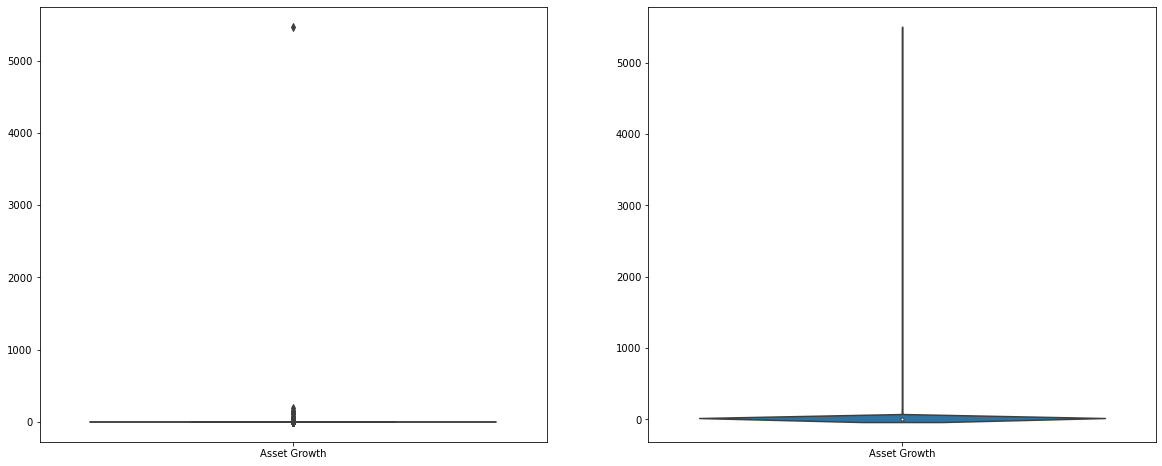

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
x = dataset.select('Asset Growth').toPandas()

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,2,1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1,2,2)
ax = sns.violinplot(data=x)

C:\Users\user\anaconda3\lib\socket.py:740: ResourceWarning: unclosed <socket.socket fd=3196, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 49586), raddr=('127.0.0.1', 49585)>
  self._sock = None


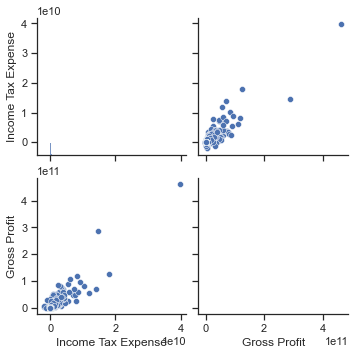

In [46]:
df_scatter_plot =dataset.select('Income Tax Expense', 'Gross Profit')

import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df_scatter_plot.toPandas())
plt.show()

In [48]:
dataset.select('Income Tax Expense','Gross Profit').show(20)

+------------------+-----------------+
|Income Tax Expense|     Gross Profit|
+------------------+-----------------+
|           2.851E9|        3.5371E10|
|   3.95595737811E7| 9.285226025186E8|
|            7.51E8|        2.0237E10|
|          804000.0|       7.323734E9|
|           8.833E8|         6.3698E9|
|           3.097E9|        1.9331E10|
|           2.201E9|        2.8109E10|
|           8.105E9|       1.18225E11|
|            3.53E8|        1.2597E10|
|           2.704E9|         1.016E10|
|  7.535110777319E8|9.4874953060458E9|
|         6679754.0|     1.62352089E8|
|  1.324070597071E8|3.1954187007135E9|
|            1.31E8|          3.277E9|
|            8.91E7|         2.2034E9|
|            8.56E8|          6.683E9|
|            3.74E8|          2.971E9|
|           1.427E9|         2.124E10|
|         3.16126E8|       1.564983E9|
|           1.783E8|         2.9274E9|
+------------------+-----------------+
only showing top 20 rows



In [49]:
dataset.corr('Income Tax Expense','Gross Profit')

0.8999669372895304

# Creating machine learning model 

In [59]:
from pyspark.ml.feature import VectorAssembler
mldataset = dataset.select(dataset.Class,dataset.Sector.alias('label'))
train, test = mldataset.randomSplit([0.8,0.2])
assembler = VectorAssembler().setInputCols(['Class']).setOutputCol('features')
train01 = assembler.transform(train)
train02 = train01.select("features","label")
train02.show(truncate=False)

+--------+---------------+
|features|label          |
+--------+---------------+
|[0.0]   |Basic Materials|
|[0.0]   |Basic Materials|
|[0.0]   |Basic Materials|
|[0.0]   |Basic Materials|
|[0.0]   |Basic Materials|
|[0.0]   |Basic Materials|
|[0.0]   |Basic Materials|
|[0.0]   |Basic Materials|
|[0.0]   |Basic Materials|
|[0.0]   |Basic Materials|
|[0.0]   |Basic Materials|
|[0.0]   |Basic Materials|
|[0.0]   |Basic Materials|
|[0.0]   |Basic Materials|
|[0.0]   |Basic Materials|
|[0.0]   |Basic Materials|
|[0.0]   |Basic Materials|
|[0.0]   |Basic Materials|
|[0.0]   |Basic Materials|
|[0.0]   |Basic Materials|
+--------+---------------+
only showing top 20 rows



In [73]:
dataset.groupBy(dataset.Sector).count().sort(desc("count")).show(20, truncate = False)

+------+-----+
|Sector|count|
+------+-----+
|null  |3808 |
+------+-----+



In [71]:
dataset = dataset.withColumnRenamed("Financial Services","1").withColumnRenamed("Healthcare","2").withColumnRenamed("Technology","3").withColumnRenamed("Industrials","4").withColumnRenamed("Consumer Cyclical","5").withColumnRenamed("Basic Materials","6").withColumnRenamed("Real Estate","7").withColumnRenamed("Energy","8").withColumnRenamed("Consumer Defensive","9").withColumnRenamed("Utilities","10").withColumnRenamed("Communication Services","11")

In [72]:
from pyspark.sql.types import IntegerType
dataset = dataset.withColumn("Sector", dataset["Sector"].cast(IntegerType()))

In [209]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator()
print(evaluator.evaluate(test03,{evaluator.metricName: "r2"}))

0.04467951159208494


In [210]:
print(model.coefficients)

[2.9188482595814857,-0.8305290569903594,0.1096008398219518,-6.993735399055581,-0.989220467123486]


In [211]:
print(model.intercept)

479.3819489069691


# Visualization using Pyspark

In [212]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.3.2
0.11.0


In [222]:
dataset2.groupBy('Firstlatitude').count().sort(desc("count")).show(20, truncate = False)

+-------------+-----+
|Firstlatitude|count|
+-------------+-----+
|51.46481323  |17   |
|51.46484892  |13   |
|51.46480237  |7    |
|33.43097751  |7    |
|51.46485901  |5    |
|33.9361624   |4    |
|51.46476746  |4    |
|19.08874512  |4    |
|33.43102407  |4    |
|-37.66052763 |4    |
|33.43103027  |3    |
|33.43107062  |3    |
|33.94651794  |3    |
|39.84075514  |3    |
|51.46475582  |3    |
|37.61918925  |3    |
|33.4309845   |3    |
|41.98388672  |3    |
|-37.66048108 |3    |
|35.04405911  |2    |
+-------------+-----+
only showing top 20 rows



In [223]:
topCat = dataset2.groupBy('Firstlatitude').count().sort(desc("count"))
topCat = topCat.toPandas()

C:\Users\user\anaconda3\lib\socket.py:740: ResourceWarning: unclosed <socket.socket fd=3316, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 63737), raddr=('127.0.0.1', 63736)>
  self._sock = None


In [ ]:
dataset2 = dataset2.withColumnRenamed("First Latitude","Firstlatitude").withColumnRenamed("First Longitude","Firstlongitude").withColumnRenamed("First Altitude","Firstaltitude").withColumnRenamed("Second Latitude","Secondlatitude").withColumnRenamed("Second Longitude","Secondlongitude").withColumnRenamed("Second Altitude","Secondaltitude")

In [224]:
topCat = topCat[:10]
top10cat = list(topCat.Firstlatitude)
print(top10cat)

[51.46481323, 51.46484892, 33.43097751, 51.46480237, 51.46485901, 51.46476746, 19.08874512, 33.43102407, 33.9361624, -37.66052763]


In [225]:
topCat = dataset2.filter(dataset2.Firstlatitude.isin(top10cat))

In [226]:
topCat = topCat.groupBy(topCat.Firstlatitude).count().sort(desc("count")).toPandas()

C:\Users\user\anaconda3\lib\socket.py:740: ResourceWarning: unclosed <socket.socket fd=3360, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 59705), raddr=('127.0.0.1', 59704)>
  self._sock = None


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[Text(0.5, 0, 'Count'), Text(0, 0.5, 'First Latitude')]

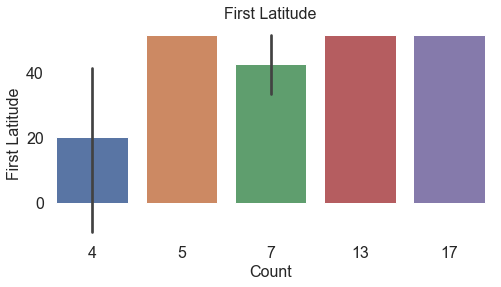

In [228]:
f, ax = plt.subplots(figsize = (8,4)) 
sns.barplot(x='count', y = 'Firstlatitude', data = topCat).set_title('First Latitude')
sns.despine(left = True, bottom = True)
ax.set(xlabel='Count', ylabel='First Latitude')

In [229]:
dataset2.groupBy('Secondlatitude').count().sort(desc("count")).show(20, truncate = False)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


+--------------+-----+
|Secondlatitude|count|
+--------------+-----+
|41.96581824   |10   |
|36.07365495   |10   |
|41.96580505   |10   |
|36.07365417   |10   |
|33.44078064   |9    |
|33.44080004   |7    |
|51.46499634   |7    |
|51.46494203   |7    |
|51.46498858   |6    |
|29.99349976   |5    |
|33.44082642   |5    |
|51.46495056   |5    |
|51.47772217   |4    |
|42.00282727   |4    |
|33.93872277   |4    |
|51.47769734   |4    |
|29.99346717   |4    |
|41.96585083   |4    |
|42.00283813   |3    |
|61.16784668   |3    |
+--------------+-----+
only showing top 20 rows



In [230]:
topCat = dataset2.groupBy('Secondlatitude').count().sort(desc("count"))
topCat = topCat.toPandas()

C:\Users\user\anaconda3\lib\socket.py:740: ResourceWarning: unclosed <socket.socket fd=3332, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 53265), raddr=('127.0.0.1', 53264)>
  self._sock = None


In [231]:
topCat = topCat[:10]
top10cat = list(topCat.Secondlatitude)
print(top10cat)

[41.96581824, 41.96580505, 36.07365417, 36.07365495, 33.44078064, 33.44080004, 51.46499634, 51.46494203, 51.46498858, 33.44082642]


In [232]:
topCat = dataset2.filter(dataset2.Secondlatitude.isin(top10cat))

In [233]:
topCat = topCat.groupBy(topCat.Secondlatitude).count().sort(desc("count")).toPandas()

C:\Users\user\anaconda3\lib\socket.py:740: ResourceWarning: unclosed <socket.socket fd=3252, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 58844), raddr=('127.0.0.1', 58843)>
  self._sock = None


[Text(0.5, 0, 'Count'), Text(0, 0.5, 'Second Latitude')]

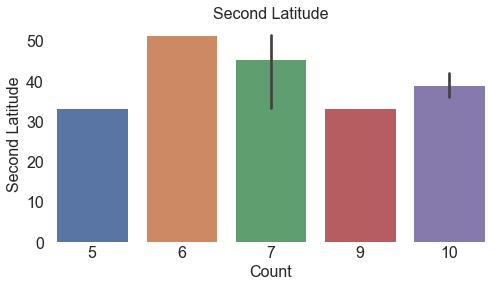

In [234]:
f, ax = plt.subplots(figsize = (8,4)) 
sns.barplot(x='count', y = 'Secondlatitude', data = topCat).set_title('Second Latitude')
sns.despine(left = True, bottom = True)
ax.set(xlabel='Count', ylabel='Second Latitude')

In [241]:
dataset2.groupBy('Firstaltitude').count().sort(desc("count")).show(20, truncate = False)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


+-------------+-----+
|Firstaltitude|count|
+-------------+-----+
|0.0          |613  |
|304.8        |519  |
|-304.8       |256  |
|609.6        |199  |
|914.4        |106  |
|1524.0       |92   |
|1219.2       |75   |
|1828.8       |24   |
|2743.2       |18   |
|2438.4       |10   |
|2133.6       |7    |
|3048.0       |4    |
|3352.8       |1    |
+-------------+-----+



In [242]:
topCat = dataset2.groupBy('Firstaltitude').count().sort(desc("count"))
topCat = topCat.toPandas()

C:\Users\user\anaconda3\lib\socket.py:740: ResourceWarning: unclosed <socket.socket fd=3116, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 59481), raddr=('127.0.0.1', 59480)>
  self._sock = None


In [243]:
topCat = topCat[:10]
top10cat = list(topCat.Firstaltitude)
print(top10cat)

[0.0, 304.8, -304.8, 609.6, 914.4, 1524.0, 1219.2, 1828.8, 2743.2, 2438.4]


In [244]:
topCat = dataset2.filter(dataset2.Firstaltitude.isin(top10cat))

In [245]:
topCat = topCat.groupBy(topCat.Firstaltitude).count().sort(desc("count")).toPandas()

C:\Users\user\anaconda3\lib\socket.py:740: ResourceWarning: unclosed <socket.socket fd=3356, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 53752), raddr=('127.0.0.1', 53751)>
  self._sock = None


[Text(0.5, 0, 'Count'), Text(0, 0.5, 'First Altitude')]

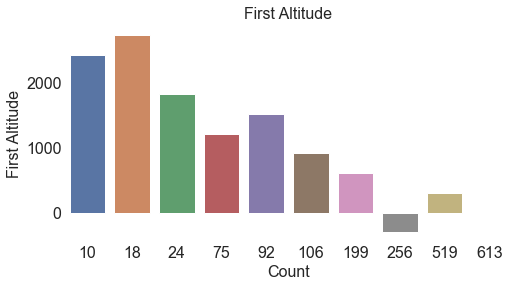

In [246]:
f, ax = plt.subplots(figsize = (8,4)) 
sns.barplot(x='count', y = 'Firstaltitude', data = topCat).set_title('First Altitude')
sns.despine(left = True, bottom = True)
ax.set(xlabel='Count', ylabel='First Altitude')

In [235]:
dataset2.groupBy('Secondaltitude').count().sort(desc("count")).show(20, truncate = False)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


+--------------+-----+
|Secondaltitude|count|
+--------------+-----+
|-38.1         |39   |
|175.26        |33   |
|-30.48        |33   |
|-60.96        |32   |
|-15.24        |31   |
|30.48         |29   |
|198.12        |27   |
|-22.86        |27   |
|144.78        |27   |
|-53.34        |27   |
|15.24         |26   |
|266.7         |25   |
|22.86         |25   |
|-7.62         |25   |
|251.46        |24   |
|45.72         |24   |
|205.74        |24   |
|220.98        |24   |
|121.92        |24   |
|-45.72        |23   |
+--------------+-----+
only showing top 20 rows



In [236]:
topCat = dataset2.groupBy('Secondaltitude').count().sort(desc("count"))
topCat = topCat.toPandas()

C:\Users\user\anaconda3\lib\socket.py:740: ResourceWarning: unclosed <socket.socket fd=3252, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 51522), raddr=('127.0.0.1', 51521)>
  self._sock = None


In [237]:
topCat = topCat[:10]
top10cat = list(topCat.Secondaltitude)
print(top10cat)

[-38.1, 175.26, -30.48, -60.96, -15.24, 30.48, -53.34, 144.78, -22.86, 198.12]


In [238]:
topCat = dataset2.filter(dataset2.Secondaltitude.isin(top10cat))

In [239]:
topCat = topCat.groupBy(topCat.Secondaltitude).count().sort(desc("count")).toPandas()

C:\Users\user\anaconda3\lib\socket.py:740: ResourceWarning: unclosed <socket.socket fd=3276, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 63658), raddr=('127.0.0.1', 63657)>
  self._sock = None


[Text(0.5, 0, 'Count'), Text(0, 0.5, 'Second Altitude')]

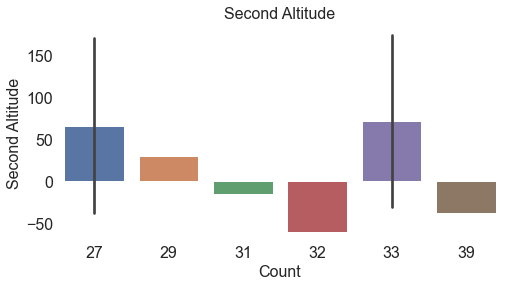

In [240]:
f, ax = plt.subplots(figsize = (8,4)) 
sns.barplot(x='count', y = 'Secondaltitude', data = topCat).set_title('Second Altitude')
sns.despine(left = True, bottom = True)
ax.set(xlabel='Count', ylabel='Second Altitude')